# Pyber Ride Sharing Analysis

Observations:

Urban cities had the greatest number of drivers and generally lower fares than other city types

Rural cities had the lowest percentage of drivers and rides, while the average fares showed the widest range.

The average fare is more affected by city type than by the number of drivers.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#import file 1
filepath = "./raw_data/city_data.csv"

city_df = pd.read_csv(filepath)
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
#import file 2
filepath2 = "./raw_data/ride_data.csv"
ride_df = pd.read_csv(filepath2)
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,1/16/16 13:49,38.35,5.403690e+12
1,South Roy,1/2/16 18:42,17.49,4.036270e+12
2,Wiseborough,1/21/16 17:35,44.18,3.645040e+12
3,Spencertown,7/31/16 14:53,6.87,2.242600e+12
4,Nguyenbury,7/9/16 4:42,6.28,1.543060e+12


In [5]:
# Merge datasets on "City" and add ride count column
combined_data_df = pd.merge(city_df, ride_df, how="outer", on="city")
combined_data_df["total_rides"] = 1
combined_data_df.head()

,city,driver_count,type,date,fare,ride_id,total_rides
0,Kelseyland,63,Urban,8/19/16 4:27,5.51,6.246010e+12,1
1,Kelseyland,63,Urban,4/17/16 6:59,5.54,7.466470e+12,1
2,Kelseyland,63,Urban,5/4/16 15:06,30.54,2.140500e+12,1
3,Kelseyland,63,Urban,1/25/16 20:44,12.08,1.896990e+12,1
4,Kelseyland,63,Urban,8/9/16 18:19,17.91,8.784210e+12,1


In [6]:
# group by city data and calculate ride count
total_drivers = combined_data_df.groupby(['city','driver_count','type']).sum()
total_drivers.head()

,,,fare,ride_id,total_rides
city,driver_count,type,,,
Alvarezhaven,21,Urban,741.79,1.658992e+14,31
Alyssaberg,67,Urban,535.85,9.195362e+13,26
Anitamouth,16,Suburban,335.84,3.776282e+13,9
Antoniomouth,21,Urban,519.75,1.119096e+14,22
Aprilchester,49,Urban,417.65,8.692095e+13,19


In [7]:
# calculate average fare per city and add in new column
total_drivers["avg_fare"] = total_drivers["fare"] / total_drivers["total_rides"]
total_drivers.head()

,,,fare,ride_id,total_rides,avg_fare
city,driver_count,type,,,,
Alvarezhaven,21,Urban,741.79,1.658992e+14,31,23.928710
Alyssaberg,67,Urban,535.85,9.195362e+13,26,20.609615
Anitamouth,16,Suburban,335.84,3.776282e+13,9,37.315556
Antoniomouth,21,Urban,519.75,1.119096e+14,22,23.625000
Aprilchester,49,Urban,417.65,8.692095e+13,19,21.981579


In [8]:
# DF Cleanup - remove ride_id and reset index
pyber_df = total_drivers.drop("ride_id", 1)
pyber_df= pyber_df.reset_index()
pyber_df.head()

,city,driver_count,type,fare,total_rides,avg_fare
0,Alvarezhaven,21,Urban,741.79,31,23.928710
1,Alyssaberg,67,Urban,535.85,26,20.609615
2,Anitamouth,16,Suburban,335.84,9,37.315556
3,Antoniomouth,21,Urban,519.75,22,23.625000
4,Aprilchester,49,Urban,417.65,19,21.981579


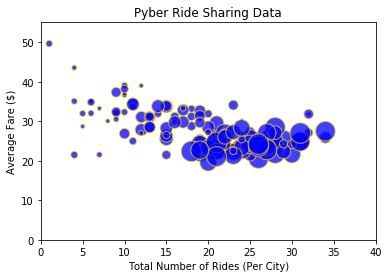

In [10]:
# create scatter plot for rides vs fare

s = 6 * pyber_df["driver_count"]
plt.ylim(0, 55)
plt.xlim(0, 40)
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.title('Pyber Ride Sharing Data')

scat_pyb = plt.scatter(pyber_df.total_rides, pyber_df.avg_fare, s=s, marker="o",color='blue',edgecolors='gold', alpha=0.75)




plt.show(scat_pyb)

In [12]:
# create urban dataframe
urban_df = pyber_df.loc[pyber_df.type=="Urban"]
urban_df.head()

,city,driver_count,type,fare,total_rides,avg_fare
0,Alvarezhaven,21,Urban,741.79,31,23.928710
1,Alyssaberg,67,Urban,535.85,26,20.609615
3,Antoniomouth,21,Urban,519.75,22,23.625000
4,Aprilchester,49,Urban,417.65,19,21.981579
5,Arnoldview,41,Urban,778.30,31,25.106452


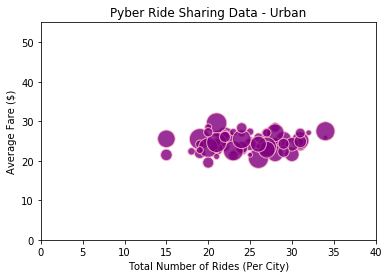

In [13]:
# plot urban scatter
s=6 * pyber_df["driver_count"]
plt.ylim(0, 55)
plt.xlim(0, 40)
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.title('Pyber Ride Sharing Data - Urban')

scat_urb = plt.scatter(urban_df.total_rides, urban_df.avg_fare, s=s, marker='o',
                    color='purple', edgecolors='pink', alpha=0.81)



plt.show(scat_urb)

In [14]:
# create rural dataframe
rural_df = pyber_df.loc[pyber_df.type=="Rural"]
rural_df.head()

,city,driver_count,type,fare,total_rides,avg_fare
17,East Leslie,9,Rural,370.27,11,33.660909
18,East Stephen,6,Rural,390.53,10,39.053000
19,East Troybury,3,Rural,232.71,7,33.244286
21,Erikport,3,Rural,240.35,8,30.043750
25,Hernandezshire,10,Rural,288.02,9,32.002222


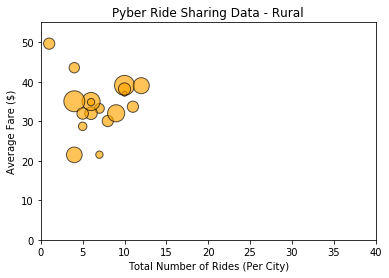

In [17]:
# plot rural scatter

s = 6 * pyber_df["driver_count"]
plt.ylim(0, 55)
plt.xlim(0, 40)
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.title('Pyber Ride Sharing Data - Rural')



scat_rural = plt.scatter(rural_df.total_rides, rural_df.avg_fare, s=s, marker='o', color="orange",
                    edgecolors="black", alpha = 0.66)



plt.show(scat_rural)

In [19]:
# create suburban dataframe
suburb_df = pyber_df.loc[pyber_df.type=="Suburban"]
suburb_df.head()

,city,driver_count,type,fare,total_rides,avg_fare
2,Anitamouth,16,Suburban,335.84,9,37.315556
6,Campbellport,26,Suburban,505.67,15,33.711333
7,Carrollbury,4,Suburban,366.06,10,36.606000
9,Clarkstad,21,Suburban,372.62,12,31.051667
10,Conwaymouth,18,Suburban,380.51,11,34.591818


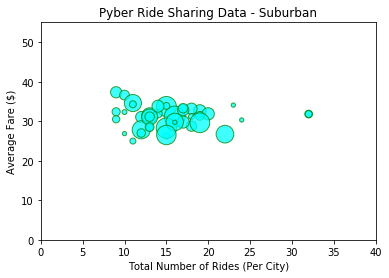

In [20]:
# plot suburban scatter

s = 6 * pyber_df["driver_count"]
plt.ylim(0, 55)
plt.xlim(0, 40)
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.title('Pyber Ride Sharing Data - Suburban')


scat_sub = plt.scatter(suburb_df.total_rides, suburb_df.avg_fare, s=s, marker='o', color = "aqua", 
                     edgecolors="green", alpha=0.75)




plt.show(scat_sub)

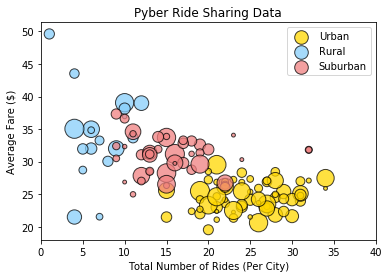

In [21]:
# create combined scatter plot

s = 5 * pyber_df["driver_count"]
# plt.ylim(0, 55)
plt.xlim(0, 40)
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.title('Pyber Ride Sharing Data')

scat_urb = plt.scatter(urban_df.total_rides, urban_df.avg_fare, s=s, marker='o',
                    color='gold', edgecolors='black', alpha=0.75, label="Urban")
scat_rural = plt.scatter(rural_df.total_rides, rural_df.avg_fare, s=s, marker='o', color="lightskyblue",
                    edgecolors="black", alpha = 0.75, label="Rural")
scat_sub = plt.scatter(suburb_df.total_rides, suburb_df.avg_fare, s=s, marker='o', color = "lightcoral", 
                     edgecolors="black", alpha=0.75, label="Suburban")

plt.legend(handles=[scat_urb, scat_rural, scat_sub], loc="best")

plt.show()


In [22]:
# display updated dataframe

pyber_df.head()


,city,driver_count,type,fare,total_rides,avg_fare
0,Alvarezhaven,21,Urban,741.79,31,23.928710
1,Alyssaberg,67,Urban,535.85,26,20.609615
2,Anitamouth,16,Suburban,335.84,9,37.315556
3,Antoniomouth,21,Urban,519.75,22,23.625000
4,Aprilchester,49,Urban,417.65,19,21.981579


In [23]:
# calculate totals total by city type

type_totals = pyber_df.groupby('type').sum()
type_totals

,driver_count,fare,total_rides,avg_fare
type,,,,
Rural,104,4255.09,125,615.728572
Suburban,638,20335.69,657,1300.433953
Urban,2607,40078.34,1625,1623.863390


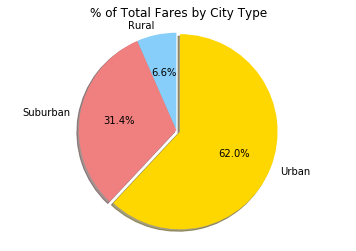

In [24]:
# create fare by city type pie chart

City_Type = ["Rural", "Suburban", "Urban"]
Fare = type_totals['fare']
colors = ["lightskyblue", "lightcoral", "gold"]
explode = (0, 0, 0.04)

plt.title("% of Total Fares by City Type")
plt.pie(Fare, explode=explode, labels=City_Type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")

plt.show()


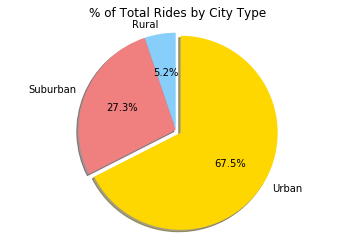

In [25]:
# create ride by city type pie chart
City_Type = ["Rural", "Suburban", "Urban"]
Rides = type_totals['total_rides']
colors = ["lightskyblue", "lightcoral", "gold"]
explode = (0, 0, 0.06)

plt.title("% of Total Rides by City Type")
plt.pie(Rides, explode=explode, labels=City_Type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")

plt.show()

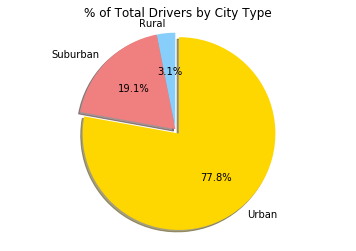

In [26]:
# create drivers by city type pie chart
City_Type = ["Rural", "Suburban", "Urban"]
Drivers = type_totals['driver_count']
colors = ["lightskyblue", "lightcoral", "gold"]
explode = (0, 0, 0.06)

plt.title("% of Total Drivers by City Type")
plt.pie(Drivers, explode=explode, labels=City_Type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")

plt.show()